In [1]:
import pickle
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
matplotlib.rcParams.update({'font.size': 13})


In [2]:
dataset = pickle.load( open( "dataset_alphabay_nocheat.p", "rb" ) )
# dataset = pickle.load( open( "dataset_alphabay.p", "rb" ) )
# dataset = pickle.load( open( "dataset_silkroad.p", "rb" ) )
# dataset = pickle.load( open( "dataset_poseidon.p", "rb" ) )

pprint(dataset[0].keys())
pprint(len(dataset)) # 8376 listings in dir

dict_keys(['description', 'category'])
53504


In [3]:
data=[]
for x in dataset:
    data.append(x.get("category"))
pprint(list(set(data)))

['Services/SocialEngineering/',
 'Weapons/Ammunition/',
 'Software&Malware/SecuritySoftware/',
 'Fraud/Other/',
 'Weapons/Long-RangeGuns/',
 'Weapons/HandWeapons/',
 'Fraud/Dumps/',
 'CounterfeitItems/Other/',
 'Drugs&Chemicals/Stimulants/',
 'Drugs&Chemicals/Prescription/',
 'Drugs&Chemicals/Benzos/',
 'OtherListings/Other/',
 'Security&Hosting/Hosting/',
 'CounterfeitItems/Electronics/',
 'Guides&Tutorials/Other/',
 'CounterfeitItems/FakeIDs/',
 'Drugs&Chemicals/Other/',
 'Drugs&Chemicals/Ecstasy/',
 'CardedItems/Appliances/',
 'Security&Hosting/Socks/',
 'CardedItems/Other/',
 'Software&Malware/ExploitKits/',
 'Services/Other/',
 'Jewels&Gold/Silver/',
 'CardedItems/Clothing/',
 'Guides&Tutorials/SocialEngineering/',
 'DigitalProducts/LegitSoftware/',
 'Fraud/CVV&Cards/',
 'Drugs&Chemicals/Cannabis&Hashish/',
 'DigitalProducts/GameKeys/',
 'Software&Malware/Botnets&Malware/',
 'Guides&Tutorials/Fraud/',
 'Services/Carding/',
 'Drugs&Chemicals/WeightLoss/',
 'Jewels&Gold/Gold/',
 'Ca

In [4]:
print("CATEGORY")
print(dataset[153].get("category"))
print("\n")
print("DESCRIPTION")
print(dataset[153].get("description"))

CATEGORY
Fraud/PersonalInformation&Scans/


DESCRIPTION
Real German Scan Passport | AlphaBay MarketYou are logged in as simurghCurrent balance: BTC 0.0000LogoutHome ●
Sales ●
Messages ●
Listings ●
Balance ●
Orders ●
Feedback ●
Forums ●
Contact       
▲USD 237.49
▲CAD 283.65
▲EUR 208.23
▲AUD 292.24
▲GBP 150.42
You have 10 new notifications! Hover here to see.[Close All]
14 May 2015, 09:42 - Listing #2146 has restocked! [Close]
14 May 2015, 20:41 - Listing #2156 has restocked! [Close]
14 May 2015, 21:19 - User #29021 (w00ty) is back from vacation! [Close]
15 May 2015, 02:04 - Listing #5904 has restocked! [Close]
15 May 2015, 02:09 - Listing #5335 has restocked! [Close]
15 May 2015, 03:40 - Listing #558 has restocked! [Close]
15 May 2015, 04:22 - Listing #559 has restocked! [Close]
15 May 2015, 05:35 - User #31616 (ozzydexies) is back from vacation! [Close]
15 May 2015, 06:12 - Listing #7413 has restocked! [Close]
15 May 2015, 06:55 - User #26323 (I_dont_know) is back from vacation! [Clos

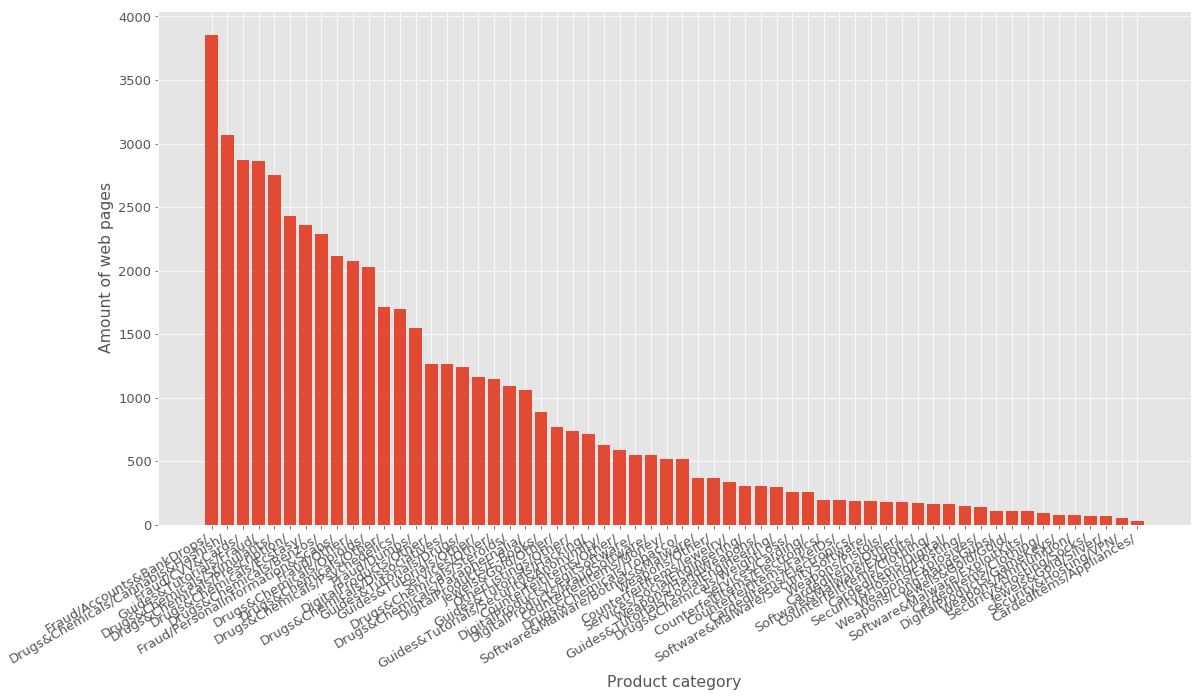

In [5]:
data={}
for x in dataset:
    try:
        data[x.get("category")] += 1
    except:
        data[x.get("category")] = 0

d_key = [k for k in sorted(data, key=lambda k: data[k], reverse=True)]
d_val = [data.get(k) for k in d_key]
    
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylabel("Amount of web pages")
plt.xlabel("Product category")
plt.bar(range(len(data)), d_val, align='center')
plt.xticks(range(len(data)), d_key)
fig.autofmt_xdate()
plt.show()


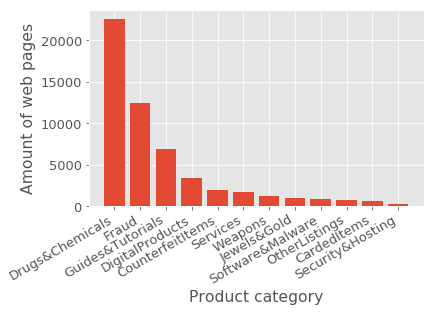

In [6]:
data={}
for x in dataset:
    try:
        cat = x.get("category").split("/")[0]
        data[cat] += 1
    except:
        cat = x.get("category").split("/")[0]
        data[cat] = 0
        
d_key = [k for k in sorted(data, key=lambda k: data[k], reverse=True)]
d_val = [data.get(k) for k in d_key]
    
fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(16, 8)
plt.ylabel("Amount of web pages")
plt.xlabel("Product category")
plt.bar(range(len(data)), d_val, align='center')
plt.xticks(range(len(data)), d_key)
fig.autofmt_xdate()
plt.show()

In [ ]:
from langdetect import detect,detect_langs
from tqdm import tqdm

language={}
for x in tqdm(dataset):
    try:
        cat = detect(x.get("description"))
        language[cat] += 1
    except:
        cat = detect(x.get("description"))
        language[cat] = 1
print(language) # ~90% english

  2%|▏         | 992/53504 [01:13<43:08, 20.29it/s]  

In [ ]:
d_key = [k for k in sorted(language, key=lambda k: language[k], reverse=True)]
d_val = [language.get(k) for k in d_key]
    
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(5, 5)
plt.bar(range(len(language)), d_val, align='center')
plt.xticks(range(len(language)), d_key)
fig.autofmt_xdate()
plt.show()